## Gamma-ray spectrum analysis with Poisson statistics-based spectral unmixing

In [1]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from script_unmix.unmix_algo import chambolle_pock
from utils.operators import prox_Nonnegative,Lpoisson,dual_prox,grad_LS

## Generate simulated gamma spectrum:
- 5 radionuclides + a background spectrum
- the measured spectrum is composed of 16173 channels

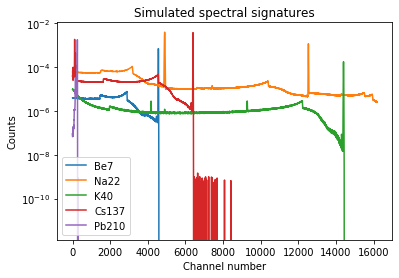

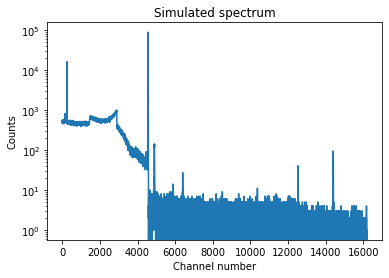

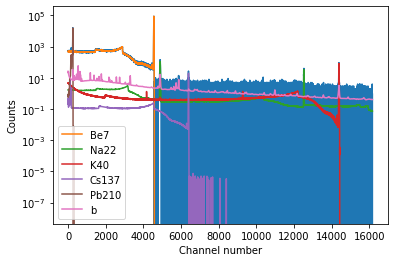

In [2]:
num = 16173
phi_sig = np.zeros((num,5))
phi_sig[:,0] = sio.loadmat('synthetic_data/Be7.mat')['counts']
phi_sig[:,1] = sio.loadmat('synthetic_data/Na22.mat')['counts']
phi_sig[:,2] = sio.loadmat('synthetic_data/K40.mat')['counts']
phi_sig[:,3] = sio.loadmat('synthetic_data/Cs137.mat')['counts']
phi_sig[:,4] = sio.loadmat('synthetic_data/Pb210.mat')['counts']
b = np.load('synthetic_data/b.npy')
a0 = np.load('synthetic_data/a0.npy')

for r,rn in zip(range(5),['Be7','Na22','K40','Cs137','Pb210']):
    plt.semilogy(phi_sig[:,r],label=rn)
plt.legend()
plt.xlabel('Channel number')
plt.ylabel('Counts')
plt.title('Simulated spectral signatures')
plt.show()

x = np.random.poisson(phi_sig@a0+b)
plt.semilogy(x);plt.title('Simulated spectrum')
plt.xlabel('Channel number')
plt.ylabel('Counts')
plt.show()

plt.semilogy(x)
for r,rn in zip(range(5),['Be7','Na22','K40','Cs137','Pb210']):
    plt.semilogy(phi_sig[:,r]*a0[r],label=rn)
plt.semilogy(b,label='b')
plt.legend()
plt.xlabel('Channel number')
plt.ylabel('Counts')
plt.show()

## Spectral unmixing with Chambolle-Pock algorithm

In [3]:
phi = np.copy(phi_sig)
N = np.linalg.norm(np.dot(phi.T,phi))
phi = phi/N
L = np.linalg.norm(np.dot(phi.T,phi),ord=2)
sigma = 5e-4
tau = (.9/(sigma*L))

nP = np.shape(phi)
a_initial = 1./nP[1]*np.ones((nP[1]))
K = lambda y: np.dot(phi,y)
KT = lambda y: np.dot(phi.T,y)
prox_g = prox_Nonnegative
prox_f = lambda a,step:Lpoisson(a+b,step)(x)-b
prox_fC = lambda u,sigma: dual_prox(prox_f)(u,sigma)
a_estim,a_list = chambolle_pock(prox_fC, prox_g, a_initial, K, KT, sigma,tau,n_item=0,tol=1e-10,verb=True,error_list=False)
a_estim = a_estim/N

iteration: 0 --error: 121.14277616563334
iteration: 1000 --error: 0.0002698554915052258
iteration: 2000 --error: 7.102343869243762e-05
iteration: 3000 --error: 2.4814531097662586e-05
iteration: 4000 --error: 9.40838140676185e-06
iteration: 5000 --error: 3.670162845976675e-06
iteration: 6000 --error: 1.4449391017607563e-06
iteration: 7000 --error: 5.691730170470923e-07
iteration: 8000 --error: 2.2285846798408745e-07
iteration: 9000 --error: 8.59026666922068e-08
iteration: 10000 --error: 3.192316151755861e-08
iteration: 11000 --error: 1.0817938096968343e-08
iteration: 12000 --error: 2.7067280315669327e-09
iteration: 13000 --error: 2.7847183782521766e-09
iteration: 14000 --error: 2.9729707902003687e-09
iteration: 15000 --error: 2.6817328711123277e-09
iteration: 16000 --error: 2.2880318443031283e-09
iteration: 17000 --error: 1.916828101672575e-09
iteration: 18000 --error: 1.6008329167318004e-09
iteration: 19000 --error: 1.3412604016495291e-09
iteration: 20000 --error: 1.1856307994976257e-0